In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("medical_insurance.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(2772, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


__About Dataset__
Dataset Overview:
The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

__Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.__

*The dataset comprises 2.7K rows and 7 columns, including:
Age,
Sex,
BMI (Body Mass Index),
Children,
Smoker,
Region,
Charges*

__Problem Statement:__

What are the primary factors influencing medical expenses?
How accurate are machine learning models in predicting medical expenses?
In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?
If you find the dataset intriguing, please consider upvoting. Thank you.


In [6]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1883,45,male,28.700,2,no,southwest,8027.96800
2512,55,male,29.900,0,no,southwest,10214.63600
1403,23,male,23.845,0,no,northeast,2395.17155
1658,41,male,37.050,2,no,northwest,7265.70250
506,22,male,31.350,1,no,northwest,2643.26850
1878,18,female,25.080,0,no,northeast,2196.47320
2622,63,female,21.660,0,no,northeast,14449.85440
2590,18,female,27.280,3,yes,southeast,18223.45120
1908,51,female,33.915,0,no,northeast,9866.30485
429,27,female,30.400,3,no,northwest,18804.75240


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

In [10]:
df.duplicated().sum()

1435

In [11]:
df.iloc[[2767,2768,2768,2769,2770,2771]]

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [12]:
for i in df:
    print(df[i].value_counts())
    print("------------------------------------")

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: count, dtype: int64
------------------------------------
sex
male      1406
female    1366
Name: count, dtype: int64
------------------------------------
bmi
32.300    26
28.310    18
33.330    16
30.800    16
30.875    16
          ..
46.200     2
23.800     2
44.770     2
32.120     2
30.970     2
Name: count, Length: 548, dtype: int64
------------------------------------
children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64
------------------------------------
smoker
no  

In [13]:
# trying to fing the how much different lables are present in our dataset
for col in df.columns:
    print(col, ":", len(df[col].unique()),"labels")

age : 47 labels
sex : 2 labels
bmi : 548 labels
children : 6 labels
smoker : 2 labels
region : 4 labels
charges : 1337 labels


from the above we can understand that there are 47 different labels in the age column, likewise for all other columns. 

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Age')

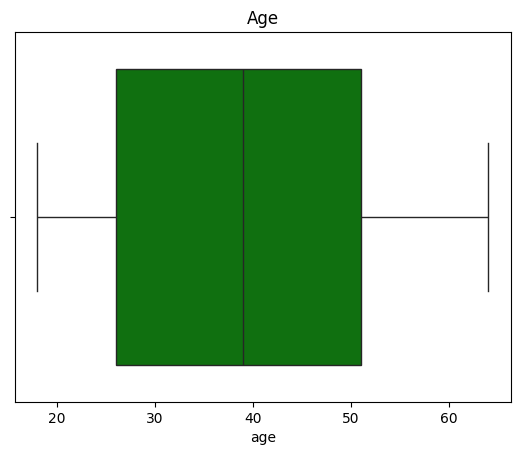

In [15]:
sns.boxplot(df["age"],orient="h",color="g").set_title("Age")

Text(0.5, 1.0, 'Body Mass Index (BMI)')

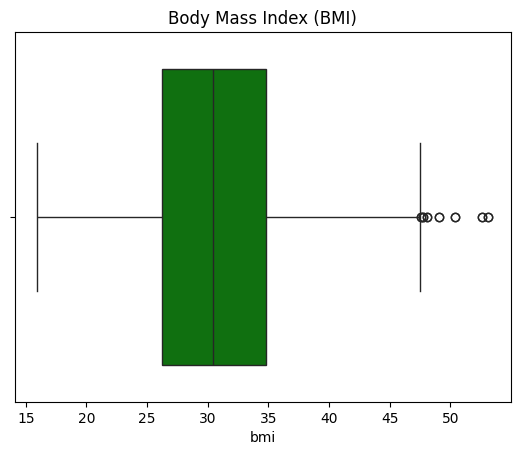

In [16]:
sns.boxplot(df["bmi"],orient="h",color="g").set_title("Body Mass Index (BMI)")

Text(0.5, 1.0, 'Number of childrens')

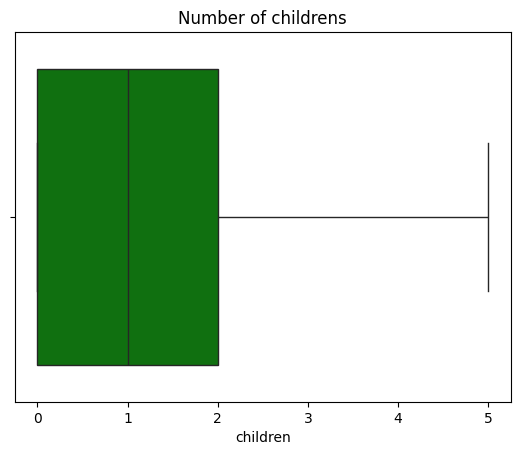

In [17]:
sns.boxplot(df["children"],orient="h",color="g").set_title("Number of childrens")

Text(0.5, 1.0, 'Premium charges')

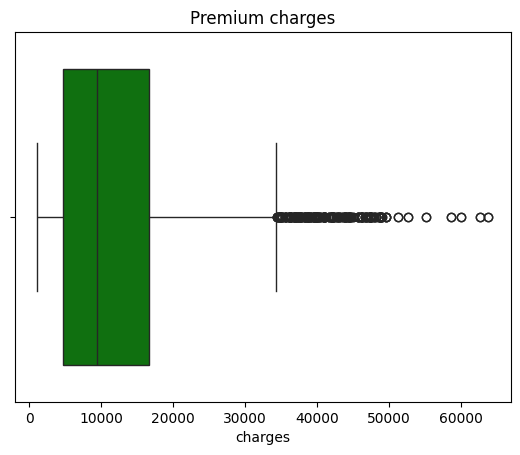

In [18]:
sns.boxplot(df["charges"],orient="h",color="g").set_title("Premium charges")

<Axes: xlabel='charges', ylabel='Count'>

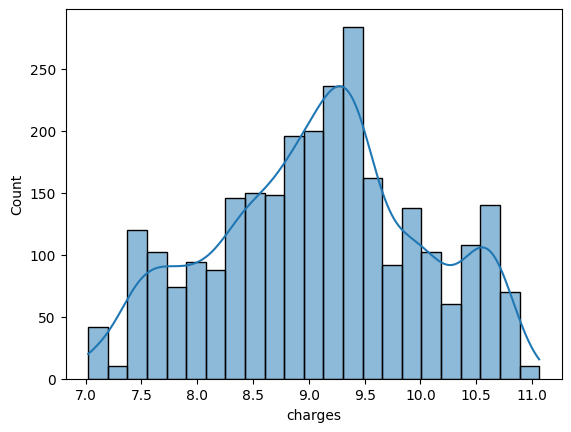

In [19]:
sns.histplot(np.log(df["charges"]),kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

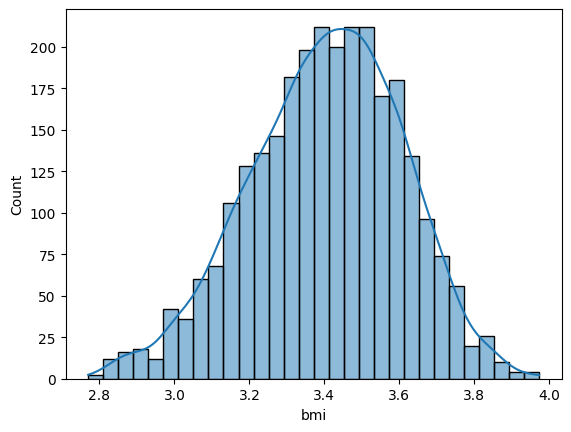

In [20]:
sns.histplot(np.log(df["bmi"]),kde=True)

In [21]:
# log_transformed_data = np.log(df[["bmi","charges"]])

In [22]:
# sns.histplot(log_transformed_data,kde=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,southeast,8569.86180
2768,21,0,34.600,0,0,southwest,2020.17700
2769,19,1,26.030,1,1,northwest,16450.89470
2770,23,1,18.715,0,0,northwest,21595.38229


In [25]:
one_hot_encoded_data = pd.get_dummies(df, columns = ["region"]) 

In [26]:
one_hot_encoded_data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,8569.86180,False,False,True,False
2768,21,0,34.600,0,0,2020.17700,False,False,False,True
2769,19,1,26.030,1,1,16450.89470,False,True,False,False
2770,23,1,18.715,0,0,21595.38229,False,True,False,False


In [27]:
x = one_hot_encoded_data
y = one_hot_encoded_data["charges"]

In [28]:
x.drop(["charges"],axis=1,inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=54)

In [31]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2217, 9)
x_test shape (555, 9)
y_train shape (2217,)
y_test shape (555,)


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
model = lr.fit(x_train,y_train)

In [38]:
y_pred = model.predict(x_test)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
print(f"R2_Score : {r2_score(y_test,y_pred)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred)}")

R2_Score : 0.7582902906285933
Mean_Squared_Error : 41884669.728915036


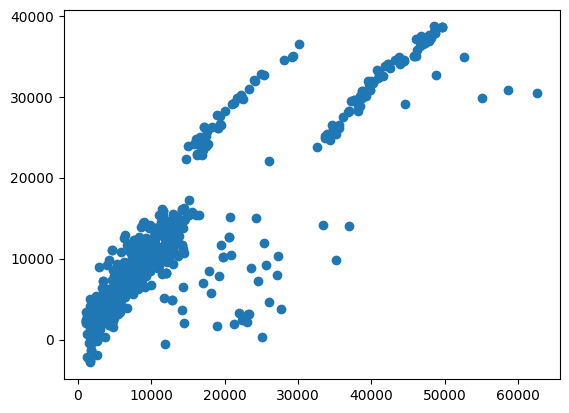

In [51]:
plt.scatter(y_test,y_pred,)
plt.show()

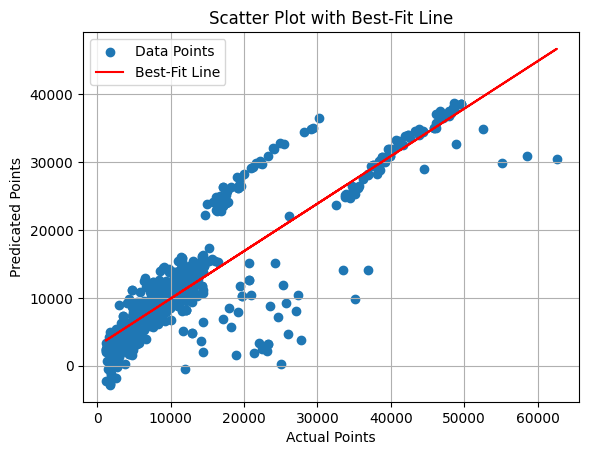

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# # Generate some sample data
x = y_test
y = y_pred

# Calculate the coefficients of the best-fit line (simple linear regression)
slope, intercept = np.polyfit(x, y, 1)

# Plot the scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the best-fit line
plt.plot(x, slope * x + intercept, color='red', label='Best-Fit Line')

# Add labels and legend
plt.xlabel('Actual Points')
plt.ylabel('Predicated Points')
plt.title('Scatter Plot with Best-Fit Line')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_r = RandomForestRegressor()

In [45]:
model = rf_r.fit(x_train,y_train)

In [55]:
y_pred1 = model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

In [57]:
print(f"R2_Score : {r2_score(y_test,y_pred1)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred1)}")

R2_Score : 0.9025250807047085
Mean_Squared_Error : 16890942.49524963


# 3) SVM 

In [58]:
from sklearn.svm import SVR

In [59]:
svr = SVR()

In [60]:
model = svr.fit(x_train,y_train)

In [61]:
y_pred3 = model.predict(x_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
print(f"R2_Score : {r2_score(y_test,y_pred1)}")
print(f"Mean_Squared_Error : { mean_squared_error(y_test,y_pred1)}")

R2_Score : 0.9025250807047085
Mean_Squared_Error : 16890942.49524963
